In [1]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# Autocorrelacion
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
# split a univariate sequence into samples
def TrainingSet(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [4]:
#cargar datos desde drive acceso libre
FILEID = "143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-06-26 20:17:47--  https://docs.google.com/uc?export=download&confirm=t&id=143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM
Resolving docs.google.com (docs.google.com)... 142.251.6.100, 142.251.6.102, 142.251.6.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.6.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/imcn8php399jcc07tki99pkkl07olbvu/1687810650000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=0c0567df-09fe-49d1-8e60-e9a49a083ceb [following]
--2023-06-26 20:17:47--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/imcn8php399jcc07tki99pkkl07olbvu/1687810650000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=0c0567df-09fe-49d1-8e60-e9a49a083ceb
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 74.125.202.132, 2607

In [5]:
ls

 Colombia_Demanda_Horaria.xlsx   Departamentos.zip
 Colombia.xlsx                   sample_data/
 D_Departamental_Horaria.xlsx    Todos_Departamentos_Depurado.xlsx
'Demanda_Caribe Ajustado.xlsx'


In [6]:
df1=pd.read_excel('/content/Colombia_Demanda_Horaria.xlsx')

In [7]:
df1 = df1.drop('Date', axis=1)
# Se establese nuevamente en el indice temporal en la nueva variable 'a', y al DataFrame se incliye la informacion de frecuencia horaria 'H' de la base de datos
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
df1.set_index(date_rng[0:-1], inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201624 entries, 2000-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Demand  201624 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

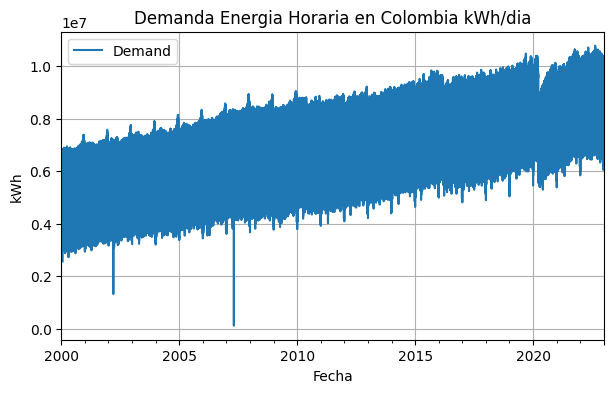

In [9]:
df1.plot(kind='line',figsize=(7,4),title='Demanda Energia Horaria en Colombia kWh/dia', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2000-01-01','2022-12-31'))

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

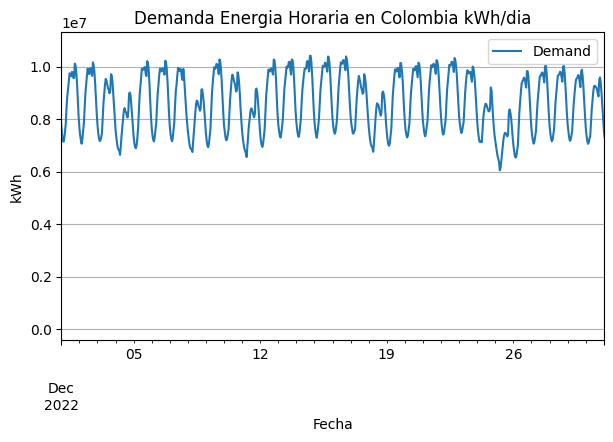

In [10]:
df1.plot(kind='line',figsize=(7,4),title='Demanda Energia Horaria en Colombia kWh/dia', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

In [11]:
Ts1=df1['2020-10-01':'2022-12-31'].values # Un año
print('Tamaño Serie Horaria: ', len(Ts1))

Tamaño Serie Horaria:  19728


In [12]:
# #  Normalizar
# Ts1 = (Ts1-min(Ts1))/(max(Ts1)-min(Ts1))

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(Ts1)
Ts1=scaler.transform(Ts1)

In [81]:
#  Particion X,Y y Time_step/step_back/window
step_back = 1

X1, Y1 = TrainingSet(Ts1,step_back)

#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1=X_test1.reshape(len(X_test1),step_back)
X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
Y_test1=Y_test1.reshape(len(Y_test1))
Y_train1=Y_train1.reshape(len(Y_train1))



In [82]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15781, 1) Tamaño Y_train1:  (15781,)
Tamaño X_test1:  (3946, 1) Tamaño Y_test1:  (3946,)
-----------------------------------------------------------------------


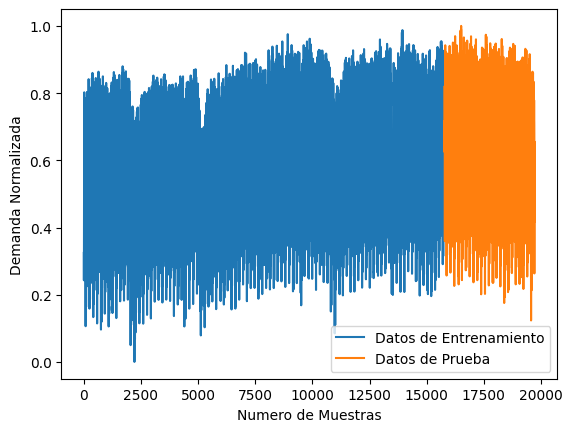

In [83]:
# Generacion de Grafica de Particiones
xx=np.arange(len(X_train1),len(Ts1)-1)
plt.plot(X_train1, label='Datos de Entrenamiento')
plt.plot(xx,X_test1, label='Datos de Prueba')
# plt.xlim(15770,15790)
plt.xlabel('Numero de Muestras')
plt.ylabel('Demanda Normalizada')
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

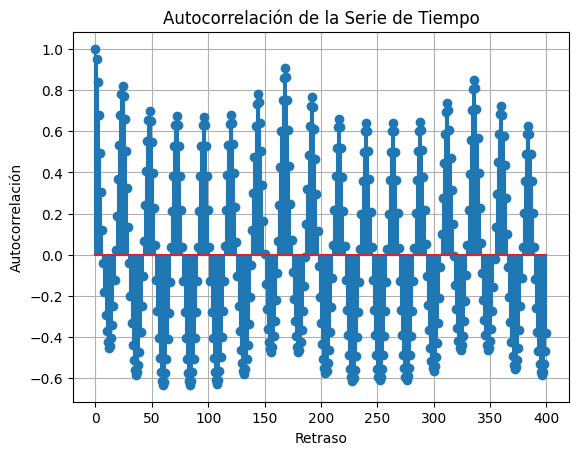

In [164]:
acorr = sm.tsa.acf(Y_test1, nlags = 400)
plt.stem(acorr)
plt.xlabel('Retraso')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie de Tiempo')
plt.grid(True)
plt.show()

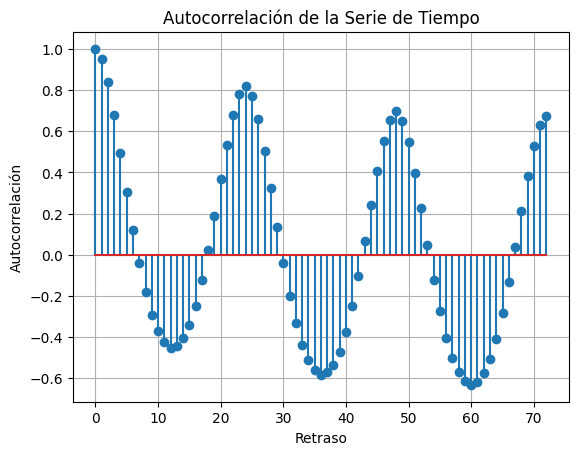

In [166]:
acorr = sm.tsa.acf(Y_test1, nlags = 72)
plt.stem(acorr)
plt.xlabel('Retraso')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie de Tiempo')
plt.grid(True)
plt.show()

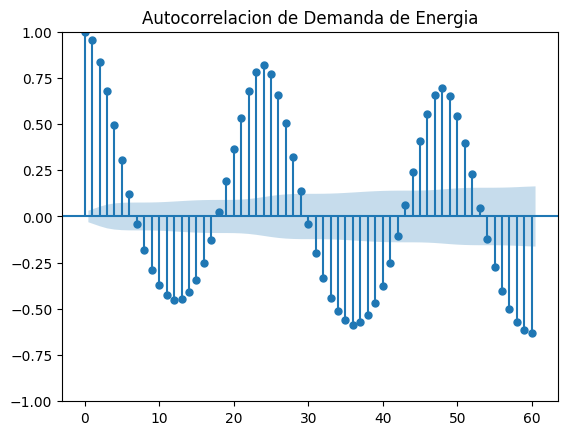

In [148]:

# plot the auto correlation
plot_acf(Y_test1,lags=60, bartlett_confint=True, title ='Autocorrelacion de Demanda de Energia')
plt.show()
